##### CTBA M3 Time Series Decomposition Assignment -- Cait Smith

In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from time import strptime

%matplotlib inline

In [367]:
df = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


In [368]:
#redesignate columns to remove "-" and spaces
df = df.rename(columns={"Month-Year": "Date", "Total Construction": "Total", "Private Construction":"Private", "Public Construction":"Public"})

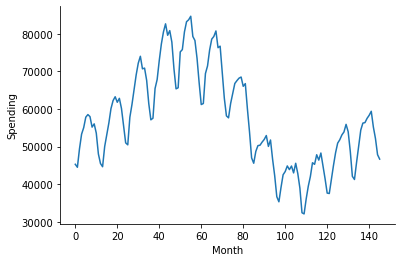

In [369]:
#now I plot private spending in order to identify trends, patterns, or 
#points of interest in the data before regressing it (will do public later in assignment)

fig,ax = plt.subplots()
ax.plot(df['Private'],label='Private Spending on Construction')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [370]:
#must change format of month from name to numerical representation
df.Date = [datetime.datetime.strptime(x,'%b-%y').strftime('%m-%Y') for x in df.Date]

df



,Month,Date,Total,Private,Public
0,1,01-2002,59516,45273,14243
1,2,02-2002,58588,44475,14113
2,3,03-2002,63782,49396,14386
3,4,04-2002,69504,53283,16221
4,5,05-2002,73384,55009,18375
...,...,...,...,...,...
141,142,10-2013,85193,59370,25823
142,143,11-2013,77931,55191,22741
143,144,12-2013,71502,52132,19369
144,145,01-2014,64661,47827,16834


In [371]:

#and reformat date a smidge more
df.Date = [datetime.datetime.strptime(x,'%m-%Y').strftime('%Y-%m') for x in df.Date]

df

,Month,Date,Total,Private,Public
0,1,2002-01,59516,45273,14243
1,2,2002-02,58588,44475,14113
2,3,2002-03,63782,49396,14386
3,4,2002-04,69504,53283,16221
4,5,2002-05,73384,55009,18375
...,...,...,...,...,...
141,142,2013-10,85193,59370,25823
142,143,2013-11,77931,55191,22741
143,144,2013-12,71502,52132,19369
144,145,2014-01,64661,47827,16834


In [372]:
df.Date = pd.DatetimeIndex(df.Date)
df

,Month,Date,Total,Private,Public
0,1,2002-01-01,59516,45273,14243
1,2,2002-02-01,58588,44475,14113
2,3,2002-03-01,63782,49396,14386
3,4,2002-04-01,69504,53283,16221
4,5,2002-05-01,73384,55009,18375
...,...,...,...,...,...
141,142,2013-10-01,85193,59370,25823
142,143,2013-11-01,77931,55191,22741
143,144,2013-12-01,71502,52132,19369
144,145,2014-01-01,64661,47827,16834


Average Squared Error per Month:  31701673.583670188
     Month       Date  Total  Private  Public        MovAvg         sqErr
6        7 2002-07-01  78863    58494   20369  52878.250000  3.153665e+07
7        8 2002-08-01  79460    57953   21507  52892.625000  2.560740e+07
8        9 2002-09-01  76542    55157   21385  52923.666667  4.987778e+06
9       10 2002-10-01  75710    56023   19687  52945.000000  9.474084e+06
10      11 2002-11-01  71362    53552   17810  52994.541667  3.107598e+05
..     ...        ...    ...      ...     ...           ...           ...
135    136 2013-04-01  70535    50022   20513  51844.583333  3.321810e+06
136    137 2013-05-01  77327    54369   22959  52041.708333  5.416287e+06
137    138 2013-06-01  81722    56228   25495  52235.083333  1.594338e+07
138    139 2013-07-01  83104    56354   26750  52616.291667  1.397046e+07
139    140 2013-08-01  85677    57481   28196  53082.125000  1.935010e+07

[134 rows x 7 columns]


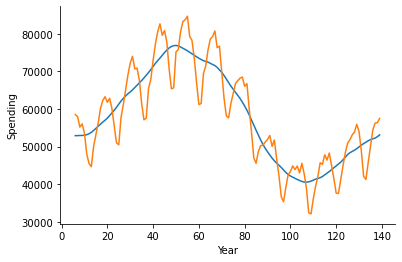

In [373]:
def sqErr(row):
    return (row['Private'] - row['MovAvg'])**2

df['MovAvg'] = np.NaN
df['sqErr'] = np.NaN

window = 12
window = window - window % 2
# Compute the moving average in the loop below using a window centered on the data point whose average is being computed
for i in range(int(window/2),df.shape[0]-int(window/2)):
    df.loc[df.index[i],'MovAvg'] = (0.5*df.iloc[i - int(window/2)]['Private'] + df.iloc[i - int(window/2)+1:i + int(window/2)]['Private'].sum() + 0.5*df.iloc[i + int(window/2)]['Private'])/float(window)

df['sqErr'] = (df['Private'] - df['MovAvg'])**2


# The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis
df.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(df['MovAvg'],label='Moving Avg.')
ax.plot(df['Private'],label='Private Construction Spending')
ax.set_xlabel('Year')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df['sqErr'])/len(df))
print(df)

In [374]:
df['R1'] = df['Private'] - df['MovAvg']
df['R1Error'] = abs((df['Private'] - df['R1'])/df['Private'])
df.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Date,Total,Private,Public,MovAvg,sqErr,R1,R1Error
6,7,2002-07-01 00:00:00,78863,58494,20369,52878.2,"31,536,648.1","5,615.8",0.904
7,8,2002-08-01 00:00:00,79460,57953,21507,52892.6,"25,607,395.1","5,060.4",0.913
8,9,2002-09-01 00:00:00,76542,55157,21385,52923.7,"4,987,777.8","2,233.3",0.960
9,10,2002-10-01 00:00:00,75710,56023,19687,52945.0,"9,474,084.0","3,078.0",0.945
10,11,2002-11-01 00:00:00,71362,53552,17810,52994.5,"310,759.8",557.5,0.990
11,12,2002-12-01 00:00:00,63984,48023,15961,53142.5,"26,209,706.9","-5,119.5",1.107
12,13,2003-01-01 00:00:00,59877,45473,14404,53392.4,"62,717,160.3","-7,919.4",1.174
13,14,2003-02-01 00:00:00,58526,44620,13906,53767.5,"83,677,518.5","-9,147.5",1.205
14,15,2003-03-01 00:00:00,64506,49996,14510,54263.0,"18,207,289.0","-4,267.0",1.085
15,16,2003-04-01 00:00:00,69638,53195,16444,54821.3,"2,644,960.1","-1,626.3",1.031


In [375]:
df['R1'] = df['Private'] - df['MovAvg']
df['R1Error'] = abs((df['Private'] - df['R1'])/df['Private'])
df.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

df

,Month,Date,Total,Private,Public,MovAvg,sqErr,R1,R1Error
6,7,2002-07-01,78863,58494,20369,52878.250000,3.153665e+07,5615.750000,0.903994
7,8,2002-08-01,79460,57953,21507,52892.625000,2.560740e+07,5060.375000,0.912681
8,9,2002-09-01,76542,55157,21385,52923.666667,4.987778e+06,2233.333333,0.959510
9,10,2002-10-01,75710,56023,19687,52945.000000,9.474084e+06,3078.000000,0.945058
10,11,2002-11-01,71362,53552,17810,52994.541667,3.107598e+05,557.458333,0.989590
...,...,...,...,...,...,...,...,...,...
135,136,2013-04-01,70535,50022,20513,51844.583333,3.321810e+06,-1822.583333,1.036436
136,137,2013-05-01,77327,54369,22959,52041.708333,5.416287e+06,2327.291667,0.957195
137,138,2013-06-01,81722,56228,25495,52235.083333,1.594338e+07,3992.916667,0.928987
138,139,2013-07-01,83104,56354,26750,52616.291667,1.397046e+07,3737.708333,0.933674


Average Residual:  30.595149253731616


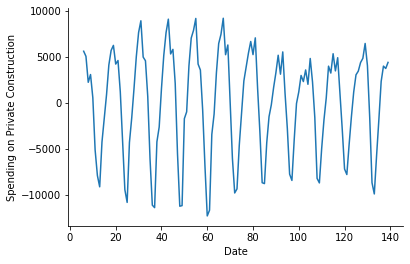

In [376]:
fig,ax = plt.subplots()
ax.plot(df['R1'])
ax.set_xlabel('Date')
ax.set_ylabel('Spending on Private Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df['R1'])/len(df))

In [377]:
maxCorr = 0.0
period = np.NaN
for i in range(1,111):
    corr = df['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8012201439941181
Correlation, lag  2     0.40461609012732014
Correlation, lag  3     -0.06681918914657624
Correlation, lag  4     -0.46817065394656976
Correlation, lag  5     -0.7334595961596327
Correlation, lag  6     -0.8453947574465044
Correlation, lag  7     -0.7277714550926004
Correlation, lag  8     -0.45905643208796476
Correlation, lag  9     -0.06590030685316586
Correlation, lag  10     0.3887655787704496
Correlation, lag  11     0.7742521355064209
Correlation, lag  12     0.9718794492320818
Correlation, lag  13     0.79396751794052
Correlation, lag  14     0.42010968825364065
Correlation, lag  15     -0.04354347496856088
Correlation, lag  16     -0.44292650393474203
Correlation, lag  17     -0.714310878305031
Correlation, lag  18     -0.8348740788345421
Correlation, lag  19     -0.7220461363177714
Correlation, lag  20     -0.4634553263719007
Correlation, lag  21     -0.07542839840758336
Correlation, lag  22     0.375754469788161
Correlation, lag  23  

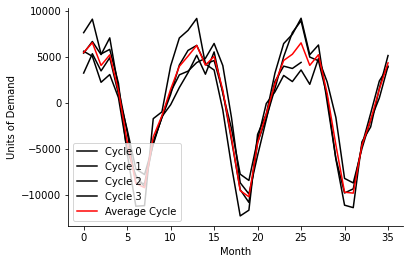

In [378]:
period = 36 #12 months in a year, each year is a cycle and b/c every twelfth entry in the series shows high correlation, but brought out to 36 so the graph shows multiple cycles
cycleLen = period
numCycles = int(len(df)/cycleLen + 1)
cycles = [df.iloc[range(i*period,min((i+1)*period,len(df)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df.iloc[range(i,len(df['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

This shows the nature of the annual cycle for private construction spending. Each cycle is 12 months (1 year) and the data encompasses 9 cycles. This shows that each cycle has high and low periods expected at the same point annually.

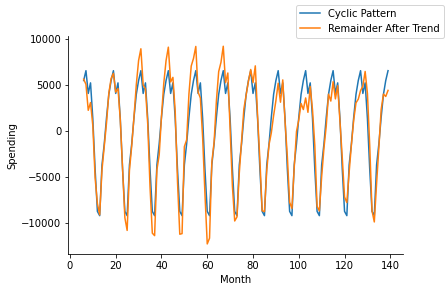

In [379]:
cycleLen = period
numCycles = int(len(df)/cycleLen + 1)
df['C'] = np.NaN   
for i in range(len(df)):
    df.loc[df.index[i], 'C'] = avg[i % 12] 

fig,ax = plt.subplots()
ax.plot(df['C'],label='Cyclic Pattern')
ax.plot(df['R1'],label='Remainder After Trend')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

This graph demonstrates that the annual cycle is predictable, though the volume of spending varies (over or under).

Average Error:  0.020546876965030287
     Month       Date  Total  Private  Public        MovAvg           R1  \
6        7 2002-07-01  78863    58494   20369  52878.250000  5615.750000   
7        8 2002-08-01  79460    57953   21507  52892.625000  5060.375000   
8        9 2002-09-01  76542    55157   21385  52923.666667  2233.333333   
9       10 2002-10-01  75710    56023   19687  52945.000000  3078.000000   
10      11 2002-11-01  71362    53552   17810  52994.541667   557.458333   
..     ...        ...    ...      ...     ...           ...          ...   
135    136 2013-04-01  70535    50022   20513  51844.583333 -1822.583333   
136    137 2013-05-01  77327    54369   22959  52041.708333  2327.291667   
137    138 2013-06-01  81722    56228   25495  52235.083333  3992.916667   
138    139 2013-07-01  83104    56354   26750  52616.291667  3737.708333   
139    140 2013-08-01  85677    57481   28196  53082.125000  4398.875000   

      R1Error            C    R2Private  R2ErrorPr

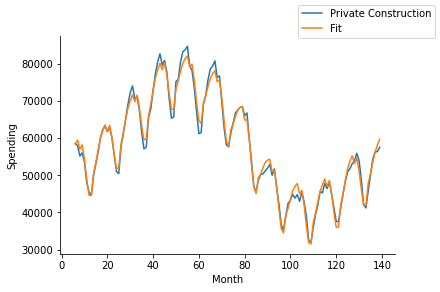

In [380]:
df['R2Private'] = df['R1'] - df['C']
df['R2ErrorPrivate'] = abs(df['R2Private']/df['Private'])
df['fit'] = df['MovAvg'] + df['C']
df.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(df['R2ErrorPrivate'])/len(df))
print(df)
fig,ax = plt.subplots()
ax.plot(df['Private'],label='Private Construction')
ax.plot(df['fit'], label = 'Fit')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Correlation, lag  1     0.6685896423559823
Correlation, lag  2     0.33411561042234206
Correlation, lag  3     -0.05363455799463054
Correlation, lag  4     -0.30916052404031263
Correlation, lag  5     -0.5136466969569432
Correlation, lag  6     -0.5518111146158362
Correlation, lag  7     -0.4706850806624464
Correlation, lag  8     -0.26653183173614026
Correlation, lag  9     -0.07398857759309757
Correlation, lag  10     0.19742347796098875
Correlation, lag  11     0.401712342740813
Correlation, lag  12     0.5796574796201658
Correlation, lag  13     0.3957561436774631
Correlation, lag  14     0.25181730853882783
Correlation, lag  15     -0.008774059313040287
Correlation, lag  16     -0.16410649629075238
Correlation, lag  17     -0.3168716787965581
Correlation, lag  18     -0.3396219519971307
Correlation, lag  19     -0.27235049069112066
Correlation, lag  20     -0.12848986193253126
Correlation, lag  21     -0.008334674841897656
Correlation, lag  22     0.13585281851766468
Correlation, 

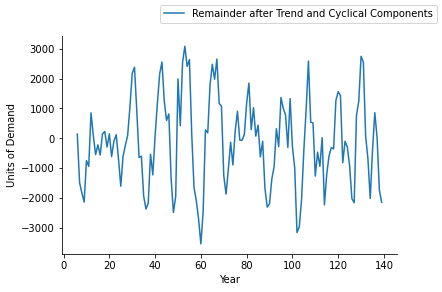

In [381]:
fig,ax = plt.subplots()
ax.plot(df['R2Private'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df['R2Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

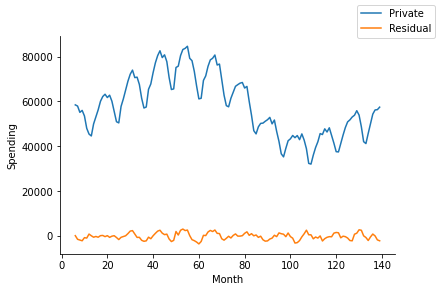

In [382]:
fig,ax = plt.subplots()
ax.plot(df['Private'],label='Private')
#ax.plot(df['fit'],label='Fit')
ax.plot(df['R2Private'],label='Residual')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Residual measures how far off the average or expected spending actual spending was. This graph shows us that the residual is not as reliably cyclical as private spending is.

In [383]:
for a in [0.1 * i for i in range(1,112)]:
    df['aC'] = a*df['C']
    df['R3'] = df['R1'] - df['aC']
    df['sqErr'] = df['R3']**2
    print('Squared Error for a =','{:.1f}'.format(a),':',sum(df['sqErr']))


Squared Error for a = 0.1 : 3516824839.0838203
Squared Error for a = 0.2 : 2860065605.589795
Squared Error for a = 0.3 : 2277746559.729731
Squared Error for a = 0.4 : 1769867701.503628
Squared Error for a = 0.5 : 1336429030.9114852
Squared Error for a = 0.6 : 977430547.9533029
Squared Error for a = 0.7 : 692872252.6290805
Squared Error for a = 0.8 : 482754144.9388193
Squared Error for a = 0.9 : 347076224.8825181
Squared Error for a = 1.0 : 285838492.46017766
Squared Error for a = 1.1 : 299040947.67179793
Squared Error for a = 1.2 : 386683590.5173785
Squared Error for a = 1.3 : 548766420.9969193
Squared Error for a = 1.4 : 785289439.1104212
Squared Error for a = 1.5 : 1096252644.8578827
Squared Error for a = 1.6 : 1481656038.2393045
Squared Error for a = 1.7 : 1941499619.2546887
Squared Error for a = 1.8 : 2475783387.904032
Squared Error for a = 1.9 : 3084507344.187338
Squared Error for a = 2.0 : 3767671488.1046
Squared Error for a = 2.1 : 4525275819.655826
Squared Error for a = 2.2 : 5

In [384]:
for a in [0.1 * i for i in range(1,112)]:
    df['aC'] = a*df['C']
    df['R3'] = df['R1'] - df['aC']
    df['sqErr'] = df['R3']**2
    print('Average Error: ', sum(df['R2ErrorPrivate'])/len(df))

Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
Average Error:  0.020546876965030287
A

### Moving on to the same analysis, but for public spending

In [385]:
df = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


In [386]:
df = df.rename(columns={"Month-Year": "Date", "Total Construction": "Total", "Private Construction":"Private", "Public Construction":"Public"})

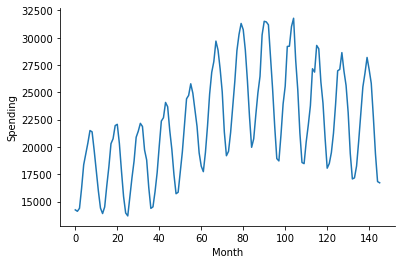

In [387]:
fig,ax = plt.subplots()
ax.plot(df['Public'],label='Public Spending on Construction')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Overall public spending on construction is also cyclical, but the total spending is a lower dollar total than in private construction. 

Average Squared Error per Month:  1469870364.2970052
     Month    Date  Total  Private  Public        MovAvg         sqErr
6        7  Jul-02  78863    58494   20369  17793.208333  1.656554e+09
7        8  Aug-02  79460    57953   21507  17791.291667  1.612963e+09
8        9  Sep-02  76542    55157   21385  17787.833333  1.396455e+09
9       10  Oct-02  75710    56023   19687  17802.291667  1.460823e+09
10      11  Nov-02  71362    53552   17810  17803.750000  1.277937e+09
..     ...     ...    ...      ...     ...           ...           ...
135    136  Apr-13  70535    50022   20513  22647.708333  7.493518e+08
136    137  May-13  77327    54369   22959  22638.708333  1.006811e+09
137    138  Jun-13  81722    56228   25495  22620.625000  1.129456e+09
138    139  Jul-13  83104    56354   26750  22609.500000  1.138691e+09
139    140  Aug-13  85677    57481   28196  22580.750000  1.218027e+09

[134 rows x 7 columns]


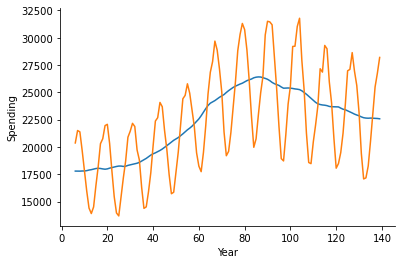

In [388]:
def sqErr(row):
    return (row['Public'] - row['MovAvg'])**2

df['MovAvg'] = np.NaN
df['sqErr'] = np.NaN

window = 12
window = window - window % 2
# Compute the moving average in the loop below using a window centered on the data point whose average is being computed
for i in range(int(window/2),df.shape[0]-int(window/2)):
    df.loc[df.index[i],'MovAvg'] = (0.5*df.iloc[i - int(window/2)]['Public'] + df.iloc[i - int(window/2)+1:i + int(window/2)]['Public'].sum() + 0.5*df.iloc[i + int(window/2)]['Public'])/float(window)

df['sqErr'] = (df['Private'] - df['MovAvg'])**2


# The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis
df.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(df['MovAvg'],label='Moving Avg.')
ax.plot(df['Public'],label='Public Construction Spending')
ax.set_xlabel('Year')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df['sqErr'])/len(df))
print(df)

In [389]:
df['R1'] = df['Public'] - df['MovAvg']
df['R1Error'] = abs((df['Public'] - df['R1'])/df['Public'])
df.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Date,Total,Private,Public,MovAvg,sqErr,R1,R1Error
6,7,Jul-02,78863,58494,20369,17793.2,"1,656,554,442.3","2,575.8",0.874
7,8,Aug-02,79460,57953,21507,17791.3,"1,612,962,816.3","3,715.7",0.827
8,9,Sep-02,76542,55157,21385,17787.8,"1,396,454,617.4","3,597.2",0.832
9,10,Oct-02,75710,56023,19687,17802.3,"1,460,822,545.5","1,884.7",0.904
10,11,Nov-02,71362,53552,17810,17803.8,"1,277,937,378.1",6.2,1.000
11,12,Dec-02,63984,48023,15961,17834.2,"911,360,626.6","-1,873.2",1.117
12,13,Jan-03,59877,45473,14404,17888.7,"760,895,445.4","-3,484.7",1.242
13,14,Feb-03,58526,44620,13906,17923.5,"712,703,112.2","-4,017.5",1.289
14,15,Mar-03,64506,49996,14510,17971.0,"1,025,600,625.0","-3,461.0",1.239
15,16,Apr-03,69638,53195,16444,18026.2,"1,236,846,838.0","-1,582.2",1.096


Average Residual:  57.485074626865725


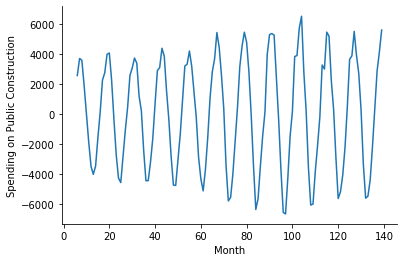

In [390]:
fig,ax = plt.subplots()
ax.plot(df['R1'])
ax.set_xlabel('Month')
ax.set_ylabel('Spending on Public Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df['R1'])/len(df))

These residuals are noteworthy as they dip even below 0, indicating a loss or businesses going "into the red" on spending.

In [391]:
maxCorr = 0.0
period = np.NaN
for i in range(1,111):
    corr = df['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8486260794687955
Correlation, lag  2     0.4813829189118818
Correlation, lag  3     -0.012518854677954336
Correlation, lag  4     -0.5037936790405375
Correlation, lag  5     -0.844451700313699
Correlation, lag  6     -0.9648820663268394
Correlation, lag  7     -0.8433331333098901
Correlation, lag  8     -0.49319137831949855
Correlation, lag  9     0.003706338528959616
Correlation, lag  10     0.487137935571806
Correlation, lag  11     0.8469321834384937
Correlation, lag  12     0.9888511486124661
Correlation, lag  13     0.8425915291399985
Correlation, lag  14     0.4841601771493216
Correlation, lag  15     -0.014370972294362676
Correlation, lag  16     -0.5036781101675367
Correlation, lag  17     -0.8390472428814717
Correlation, lag  18     -0.9594254272891752
Correlation, lag  19     -0.8378035112340598
Correlation, lag  20     -0.4886749806865292
Correlation, lag  21     0.0008985498131579394
Correlation, lag  22     0.48241856848419895
Correlation, lag  23

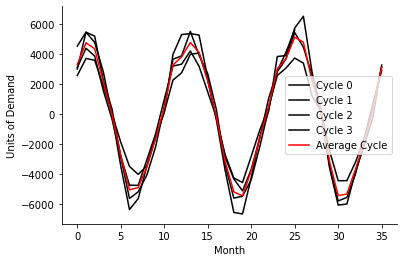

In [392]:
period = 36 #12 months in a year, each year is a cycle & high correlation every twelfth instance, but brought out to 36 to show multiple cycles
cycleLen = period
numCycles = int(len(df)/cycleLen + 1)
cycles = [df.iloc[range(i*period,min((i+1)*period,len(df)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df.iloc[range(i,len(df['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

This follows the trend we saw in private construction spending with high and low points occuring at the same point in the cycle, but at different volumes annually. 

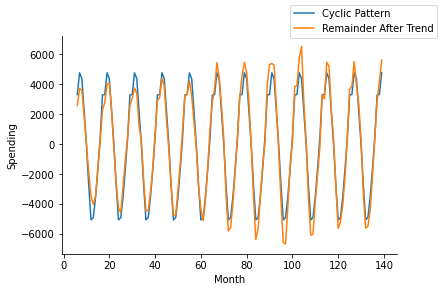

In [393]:
cycleLen = period
numCycles = int(len(df)/cycleLen + 1)
df['C'] = np.NaN   
for i in range(len(df)):
    df.loc[df.index[i], 'C'] = avg[i % 12] 

fig,ax = plt.subplots()
ax.plot(df['C'],label='Cyclic Pattern')
ax.plot(df['R1'],label='Remainder After Trend')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Average Error:  0.02457053480456341
     Month    Date  Total  Private  Public        MovAvg         sqErr  \
6        7  Jul-02  78863    58494   20369  17793.208333  1.656554e+09   
7        8  Aug-02  79460    57953   21507  17791.291667  1.612963e+09   
8        9  Sep-02  76542    55157   21385  17787.833333  1.396455e+09   
9       10  Oct-02  75710    56023   19687  17802.291667  1.460823e+09   
10      11  Nov-02  71362    53552   17810  17803.750000  1.277937e+09   
..     ...     ...    ...      ...     ...           ...           ...   
135    136  Apr-13  70535    50022   20513  22647.708333  7.493518e+08   
136    137  May-13  77327    54369   22959  22638.708333  1.006811e+09   
137    138  Jun-13  81722    56228   25495  22620.625000  1.129456e+09   
138    139  Jul-13  83104    56354   26750  22609.500000  1.138691e+09   
139    140  Aug-13  85677    57481   28196  22580.750000  1.218027e+09   

              R1   R1Error            C     R2Public  R2ErrorPublic  \
6   

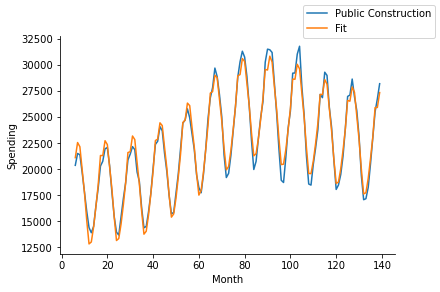

In [394]:
df['R2Public'] = df['R1'] - df['C']
df['R2ErrorPublic'] = abs(df['R2Public']/df['Public'])
df['fit'] = df['MovAvg'] + df['C']
#df.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(df['R2ErrorPublic'])/len(df))
print(df)
fig,ax = plt.subplots()
ax.plot(df['Public'],label='Public Construction')
ax.plot(df['fit'], label = 'Fit')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

The data and graph above are expected based on previous analysis and are an even closer fit than we saw with private spending.

Correlation, lag  1     0.6099004559324944
Correlation, lag  2     0.296881541461072
Correlation, lag  3     0.018827864418736816
Correlation, lag  4     -0.36209828449342535
Correlation, lag  5     -0.5822820643287583
Correlation, lag  6     -0.6186324862957215
Correlation, lag  7     -0.6437732872597419
Correlation, lag  8     -0.39724567322535614
Correlation, lag  9     -0.05295846726587747
Correlation, lag  10     0.15021179020245712
Correlation, lag  11     0.45446709990035117
Correlation, lag  12     0.6482729097040647
Correlation, lag  13     0.48584253277425016
Correlation, lag  14     0.44647695657639724
Correlation, lag  15     0.1460114022311892
Correlation, lag  16     -0.13086423134966443
Correlation, lag  17     -0.33790269430451375
Correlation, lag  18     -0.47983880219544645
Correlation, lag  19     -0.530644405973996
Correlation, lag  20     -0.3599410648788688
Correlation, lag  21     -0.19174220088436994
Correlation, lag  22     0.04483068572770154
Correlation, lag 

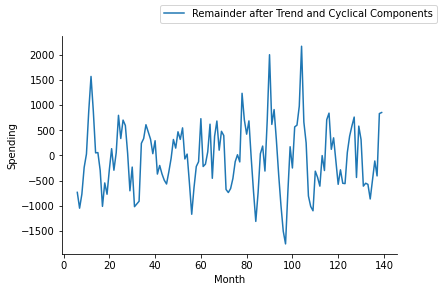

In [395]:
fig,ax = plt.subplots()
ax.plot(df['R2Public'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df['R2Public'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

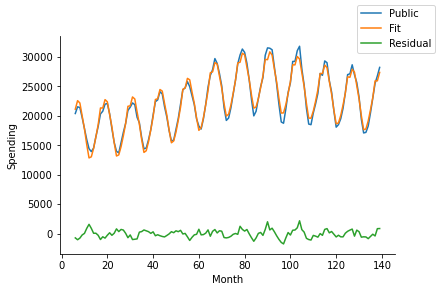

In [396]:
fig,ax = plt.subplots()
ax.plot(df['Public'],label='Public')
ax.plot(df['fit'],label='Fit')
ax.plot(df['R2Public'],label='Residual')
ax.set_xlabel('Month')
ax.set_ylabel('Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

In [397]:
for a in [0.1 * i for i in range(1,112)]:
    df['aC'] = a*df['C']
    df['R3'] = df['R1'] - df['aC']
    df['sqErr'] = df['R3']**2
    print('Squared Error for a =','{:.1f}'.format(a),':',sum(df['sqErr']))

Squared Error for a = 0.1 : 1437365911.4476316
Squared Error for a = 0.2 : 1158041618.8768096
Squared Error for a = 0.3 : 910254176.1694802
Squared Error for a = 0.4 : 694003583.3256423
Squared Error for a = 0.5 : 509289840.34529626
Squared Error for a = 0.6 : 356112947.22844166
Squared Error for a = 0.7 : 234472903.97507903
Squared Error for a = 0.8 : 144369710.58520836
Squared Error for a = 0.9 : 85803367.05882917
Squared Error for a = 1.0 : 58773873.395941846
Squared Error for a = 1.1 : 63281229.596546255
Squared Error for a = 1.2 : 99325435.66064236
Squared Error for a = 1.3 : 166906491.5882304
Squared Error for a = 1.4 : 266024397.37931022
Squared Error for a = 1.5 : 396679153.033881
Squared Error for a = 1.6 : 558870758.5519447
Squared Error for a = 1.7 : 752599213.9334999
Squared Error for a = 1.8 : 977864519.178546
Squared Error for a = 1.9 : 1234666674.287085
Squared Error for a = 2.0 : 1523005679.2591136
Squared Error for a = 2.1 : 1842881534.0946367
Squared Error for a = 2.2

In [398]:
for a in [0.1 * i for i in range(1,112)]:
    df['aC'] = a*df['C']
    df['R3'] = df['R1'] - df['aC']
    df['sqErr'] = df['R3']**2   
    print('Average Error: ', sum(df['R2ErrorPublic'])/len(df))

Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.02457053480456341
Average Error:  0.0245705348